In [0]:
# importing necessarry libraries
from pyspark.sql.functions import countDistinct,col, split, to_date, lit
import matplotlib.pyplot as plt

In [0]:
# Create load csv data function
def load_csv(path, contain_header = True, delimiter = None):
    # check if delimiter is not default delimiter
    if delimiter == None:
        dataframe = spark.read.csv(path, header=contain_header)
        display(dataframe.limit(5))
        return dataframe
    dataframe = spark.read.option("delimiter", delimiter).option("header", "true").csv(path)
    display(dataframe.limit(5))
    return dataframe
 
# Instantiate clinical trial year
Clinicaltrial_year = "2021"
 
# file extension to accomodate csv 
ext = "csv"

In [0]:
# load the dataset
default_path = "/FileStore/tables/"
clinicaltrial_df = load_csv(default_path +"clinicaltrial_"+ Clinicaltrial_year +"." + ext, delimiter = "|")



Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null


In [0]:
pharma_df = load_csv(default_path + "pharma." + ext)

Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,null
Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,null,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.,federal,agency action,Food and Drug Administration referral to the Justice Department,civil and criminal,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote,null
Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,null,"Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases,null
"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,null,federal,agency action,Labor Department Wage and Hour Division,civil,null,null,1527129,null,null,Puerto Rico,San Juan,null,null,423450,"423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php","Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide ca

In [0]:
pharma_df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: string (nullable = true)
 |-- Penalty_Date: string (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string (

In [0]:
clinicaltrial_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



##Question 1
 The number of studies in the dataset. You must ensure that you explicitly check 
distinct studies.

In [0]:
# Total number of studies that are distinct rows before counting
TotalStudies = clinicaltrial_df.distinct().count()
print(f"The total studies is {TotalStudies}")


The total studies is 387261


##Question 2
You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
# Group the study by type column and then count by group
Types = clinicaltrial_df.groupby("Type").count().withColumnRenamed("count", "Frequency")
Type_Frequency = Types.orderBy("count", ascending = False)
display(Type_Frequency)

Type,Frequency
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


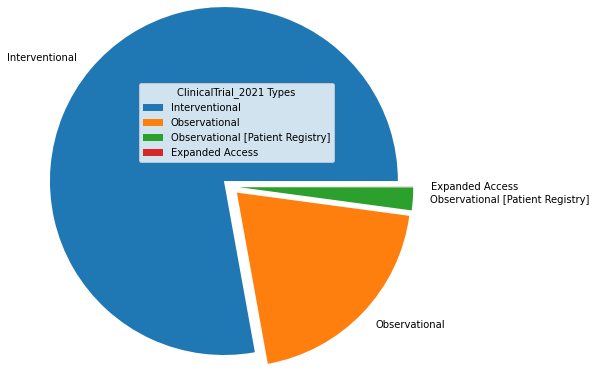

In [0]:
#Visualization for list all the types 
listof_types = Type_Frequency.toPandas()
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(listof_types["Frequency"], labels = listof_types["Type"], explode = explode, radius=2)
plt.legend(title = "ClinicalTrial_2021 Types")
plt.show()

##Question 3
The top 5 conditions (from Conditions) with their frequencies.

In [0]:
# The row of the dataframe make it through loop  and split each row columnn value
conditions_col = {}
for row in clinicaltrial_df.collect():
    if row["Conditions"] == None:
        continue
    condition_list = row["Conditions"].split(",")
    for condition in condition_list:
        if condition in conditions_col:
            conditions_col[condition] += 1
        else:
            conditions_col[condition] = 1

In [0]:
# Sort conditions in descending order
conditions_sort = sorted(conditions_col.items() , key =lambda value:(value[1], value[0]),reverse=True)
 
# create dataframe with it and pick top 5
Top_5_conditions = spark.createDataFrame(conditions_sort, ["Conditions", "Frequency"]).limit(5)
 
# display the top 5
display(Top_5_conditions)

Conditions,Frequency
Carcinoma,13389
Diabetes Mellitus,11080
Neoplasms,9371
Breast Neoplasms,8640
Syndrome,8032


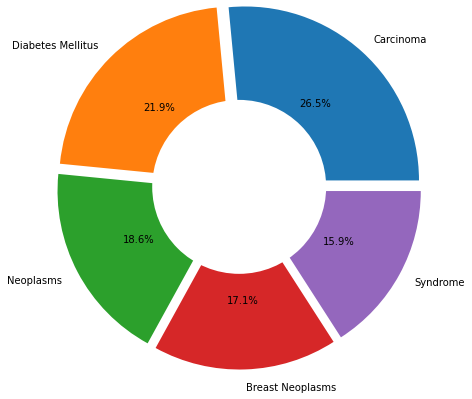

In [0]:
#Visualization for top 5 conditions and thier frequencies
Top_cond_freq = Top_5_conditions.toPandas()
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(x=Top_cond_freq["Frequency"], labels = Top_cond_freq["Conditions"], radius=2, explode=explode,autopct='%.1f%%', pctdistance=0.6)
# Draw the center shape
shape = plt.Circle((0, 0), 1.0, fc='white')
figure = plt.gcf()
# fix the center shape to the chart
figure.gca().add_artist(shape)
plt.show()

##Question 4
Find the 10 most common sponsors that are not pharmaceutical companies, along 
with the number of clinical trials they have sponsored.

In [0]:
# clinical trials by sponsors making with group
Group_sponsor = clinicaltrial_df.groupby("Sponsor").count().orderBy("count", ascending=False)
# Select the parent comapany column of pharma_df and remove duplicates
parent_company = pharma_df.select("Parent_Company").distinct()
# Left join Group_sponsor with the parent_company to show all rows and matching rows of both
clinicaltrial2021_join = Group_sponsor.join(parent_company,Group_sponsor.Sponsor ==  parent_company.Parent_Company,"left")
# Select the clinicaltrial2021_join where parent_company column is null then select the sponsor and count column only
non_pharmacy_sponsor = clinicaltrial2021_join.filter(col("Parent_Company").isNull()).select("Sponsor", "count")
# The top 10 of the data
non_pharmacy_sponsor_top10 = non_pharmacy_sponsor.orderBy("count", ascending=False).limit(10)
# Displaying the top_10 non pharmceutical sponsor 
display(non_pharmacy_sponsor_top10)

Sponsor,count
National Cancer Institute (NCI),3218
M.D. Anderson Cancer Center,2414
Assistance Publique - Hôpitaux de Paris,2369
Mayo Clinic,2300
Merck Sharp & Dohme Corp.,2243
Assiut University,2154
Novartis Pharmaceuticals,2088
Massachusetts General Hospital,1971
Cairo University,1928
Hoffmann-La Roche,1828


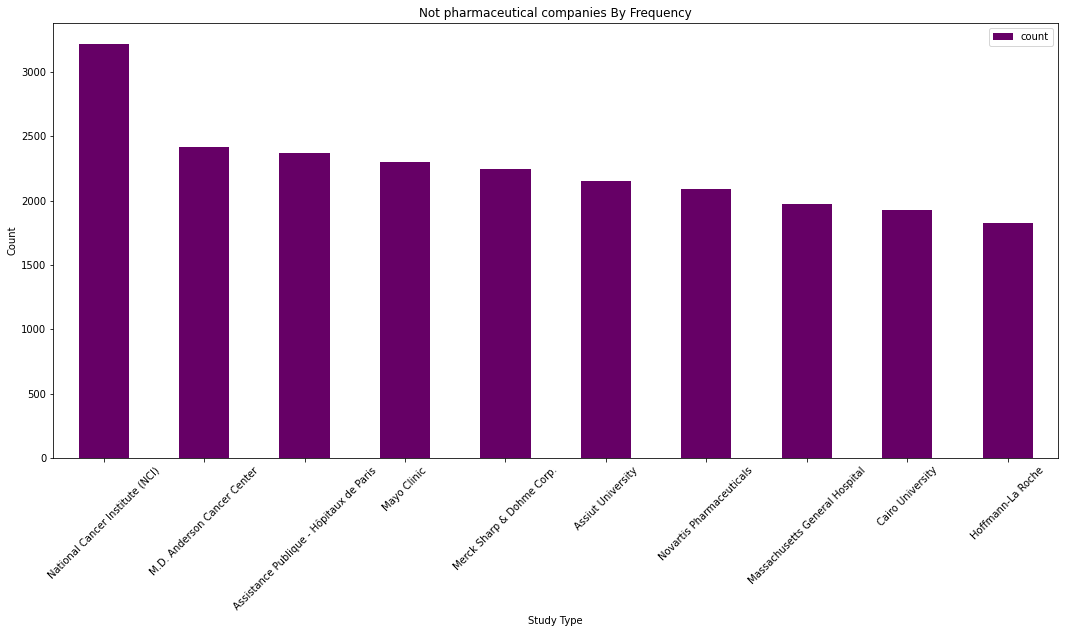

In [0]:
#Visualization for Top 10 Non Pharmacy sponsers 
non_pharmacy_Top10_sponser = non_pharmacy_sponsor_top10.toPandas()
 
non_pharmacy_Top10_sponser.plot(kind="bar", x="Sponsor", y = "count", figsize=(18,8), color="#660066")
plt.xlabel("Study Type")
plt.ylabel("Count")
plt.title("Not pharmaceutical companies By Frequency")
plt.xticks(rotation=45)
plt.show()

##Question5
 Plot number of completed studies each month in a given year – for the submission 
dataset, the year is 2021. You need to include your visualization as well as a table 
of all the values you have plotted for each month.

In [0]:
# Select rows where status is completed
completed_trial = clinicaltrial_df.filter(col("Status")== "Completed")
 
# Select rows with completion in selected year
completed_trial_2021 = completed_trial.filter(col("Completion").contains(clinicaltrial_year))
 
# Show all data that are completed 
display(completed_trial_2021)
 
# Group table by Competion column and count each grouping
completed_trial_2021_group = completed_trial_2021.groupBy("Completion").count()
 
 

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null
NCT02758704,St. Justine's Hospital,Completed,Oct 2015,Jun 2021,Interventional,Apr 2016,null,null
NCT02754778,Martin-Luther-Universität Halle-Wittenberg,Completed,Apr 2016,Mar 2021,Interventional,Apr 2016,"Pre-Eclampsia,HELLP Syndrome,Syndrome",null
NCT02758782,"Charite University, Berlin, Germany",Completed,Sep 2016,Jan 2021,Interventional,Apr 2016,Spondylitis,"Celecoxib,Golimumab"
NCT02751151,Inova Health Care Services,Completed,Feb 2016,May 2021,Interventional,Mar 2016,Skin Neoplasms,Aminolevulinic Acid
NCT02759575,Vinita Takiar,Completed,Apr 2016,Feb 2021,Interventional,Apr 2016,"Carcinoma,Squamous Cell Carcinoma of Head and Neck",Pembrolizumab
NCT02758626,NYU Langone Health,Completed,Nov 2016,Feb 2021,Interventional,Apr 2016,"Epilepsy,Epilepsies",null
NCT02755402,Centre hospitalier de l'Université de Montréal (CHUM),Completed,Jan 2017,May 2021,Interventional,Apr 2016,Hepatitis C,null
NCT02758574,University of Pittsburgh,Completed,May 2016,Aug 2021,Interventional,Mar 2016,"Pulmonary Embolism,Embolism",null
NCT02750215,Massachusetts General Hospital,Completed,May 2016,May 2021,Interventional,Apr 2016,Lung Neoplasms,null


In [0]:
# Order by completion 
Ordered_Completed_Trial_2021 = completed_trial_2021_group.orderBy(to_date(completed_trial_2021_group.Completion, "MMM yyyy")).select("Completion", "count")
 
# display the completed_trial table
display(Ordered_Completed_Trial_2021)

Completion,count
Jan 2021,1131
Feb 2021,934
Mar 2021,1227
Apr 2021,967
May 2021,984
Jun 2021,1094
Jul 2021,819
Aug 2021,700
Sep 2021,528
Oct 2021,187


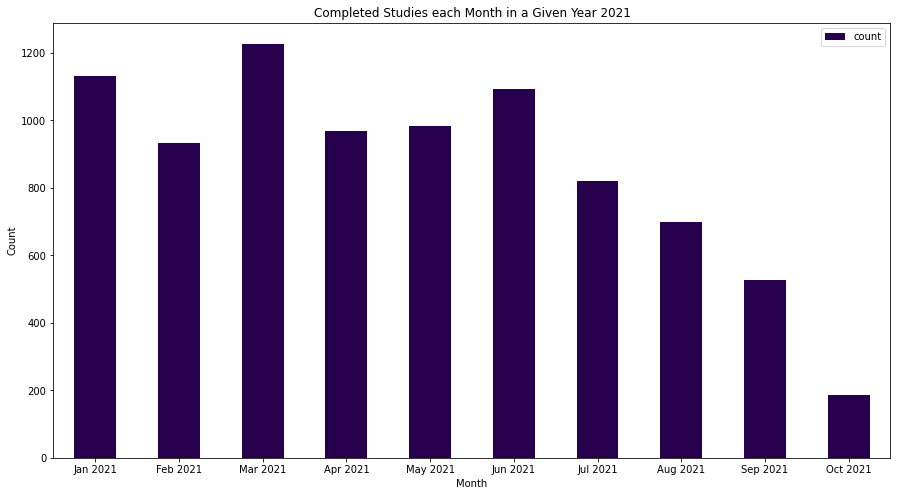

In [0]:
#Visualization for completed studies each month in a given year
completed_studies = Ordered_Completed_Trial_2021.toPandas()
 
completed_studies.plot(kind="bar", x="Completion", y = "count", figsize=(15,8), color="#26004d")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title(f"Completed Studies each Month in a Given Year {clinicaltrial_year}")
plt.xticks(rotation=0)
plt.show()